In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from wordcloud import WordCloud
from collections import Counter
import squarify
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import plotly.graph_objects as go

In [5]:
# Sample text based on the provided information
text = """
In the article by Barros (2019), he asserts that the idea of Dugin’s influence is blown out of proportion. Although recognized for his anti-globalist and ultranationalist ideologies, Dugin hardly ever determines what happens at Kremlin. The text implies that Dugin serves as a token used to hook into the interests of extreme right groups in West instead of being the supreme planner. This point of view calls into question the claim that Dugin holds sway over Russian authorities and emphasizes that there are others involved in formulating Russia’s stance towards various issues.
Naxera’s analysis emphasizes Dugin’s unique place in Russian geopolitics, particularly his theory of a bipolar world divided between Atlantic and Eurasian powers. Dugin’s views frame Russia as the central defender against Western initiatives. This case study provides insight into Dugin’s ideological framework and its role in shaping perceptions of Russia’s global position.
Kalinin examines the relevance of Dugin’s neo-Eurasianism in contemporary Russian politics. The article finds that while Dugin’s theories were influential before the annexation of Crimea, their impact on Russian elites' foreign policy views has diminished. This case study highlights the evolving relevance of Dugin’s ideas and suggests that his influence should not be overstated.
This study analyzes how media coverage impacts political success, with a focus on the role of negative coverage in shaping public perception. The findings indicate that negative media portrayals of Dugin and his influence contribute to a more critical view of his role in Russian politics. This case study underscores the importance of media tone in shaping public opinion.
Stawiarski’s article reports on Dugin’s view of the Ukraine conflict as a spiritual and existential struggle against the West. Dugin’s framing of the war in religious terms reflects his belief in a larger ideological battle. This case study highlights the depth of Dugin’s commitment to his worldview and its impact on his public statements and actions.
Gleadow discusses Dugin’s influence on Putin’s worldview and Russian foreign policy, particularly in relation to the Ukraine invasion. The article emphasizes Dugin’s role in shaping Russia’s strategies and his ongoing impact through disinformation and propaganda. This case study provides insight into the practical implications of Dugin’s ideas on Russian foreign policy.
"""

In [6]:
# 1. Word Cloud
def create_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud: Key Concepts in Dugin-Putin Relationship")
    plt.show()

In [7]:
# 2. Bar Chart
def create_bar_chart(text):
    words = text.split()
    word_freq = Counter(words)
    top_words = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:15])
    plt.figure(figsize=(12, 6))
    plt.bar(top_words.keys(), top_words.values())
    plt.title("Top 15 Most Frequent Words")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [8]:
# 3. Pie Chart
def create_pie_chart(text):
    words = text.split()
    word_freq = Counter(words)
    top_words = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:8])
    plt.figure(figsize=(10, 8))
    plt.pie(top_words.values(), labels=top_words.keys(), autopct='%1.1f%%', startangle=90)
    plt.title("Distribution of Top 8 Key Terms")
    plt.axis('equal')
    plt.show()

In [9]:
# 4. Network Graph
def create_network_graph(text):
    words = text.split()
    G = nx.Graph()
    for i in range(len(words) - 1):
        G.add_edge(words[i], words[i+1])
    
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=8, font_weight='bold')
    nx.draw_networkx_labels(G, pos)
    plt.title("Network Graph: Connections between Key Concepts")
    plt.axis('off')
    plt.show()

In [10]:
# 5. Treemap
def create_treemap(text):
    words = text.split()
    word_freq = Counter(words)
    top_words = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20])
    
    plt.figure(figsize=(12, 8))
    squarify.plot(sizes=list(top_words.values()), label=list(top_words.keys()), alpha=0.8)
    plt.title("Treemap of Top 20 Key Terms")
    plt.axis('off')
    plt.show()

In [11]:

# 6. Heatmap
def create_heatmap(text):
    words = text.split()
    word_freq = Counter(words)
    top_words = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10])
    
    matrix = np.outer(list(top_words.values()), list(top_words.values()))
    plt.figure(figsize=(12, 10))
    plt.imshow(matrix, cmap='YlOrRd')
    plt.colorbar()
    plt.xticks(range(len(top_words)), list(top_words.keys()), rotation=45, ha='right')
    plt.yticks(range(len(top_words)), list(top_words.keys()))
    plt.title("Heatmap of Word Co-occurrence")
    plt.tight_layout()
    plt.show()

In [12]:
# 7. Bubble Chart
def create_bubble_chart(text):
    words = text.split()
    word_freq = Counter(words)
    top_words = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:20])
    
    x = np.random.rand(len(top_words))
    y = np.random.rand(len(top_words))
    
    plt.figure(figsize=(12, 8))
    plt.scatter(x, y, s=[v*50 for v in top_words.values()], alpha=0.5)
    for i, (word, freq) in enumerate(top_words.items()):
        plt.annotate(word, (x[i], y[i]), ha='center', va='center')
    plt.title("Bubble Chart: Key Concepts in Dugin-Putin Relationship")
    plt.axis('off')
    plt.show()

In [13]:

# 8. Radar Chart
def create_radar_chart(text):
    words = text.split()
    word_freq = Counter(words)
    top_words = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:8])
    
    categories = list(top_words.keys())
    values = list(top_words.values())
    
    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False)
    values = np.concatenate((values, [values[0]]))
    angles = np.concatenate((angles, [angles[0]]))
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
    ax.plot(angles, values)
    ax.fill(angles, values, alpha=0.3)
    ax.set_thetagrids(angles[:-1] * 180/np.pi, categories)
    plt.title("Radar Chart: Key Concepts Distribution")
    plt.show()


In [14]:
# 9. Stacked Area Chart
def create_stacked_area_chart(text):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform([text])
    
    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(X)
    
    topic_words = []
    for topic_idx, topic in enumerate(lda.components_):
        top_words_idx = topic.argsort()[:-10 - 1:-1]
        top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
        topic_words.append(top_words)
    
    x = range(10)
    y = np.array([topic[:10] for topic in lda.components_]).T
    
    plt.figure(figsize=(12, 6))
    plt.stackplot(x, y.T, labels=[f'Topic {i+1}' for i in range(5)])
    plt.title("Stacked Area Chart: Topic Distribution")
    plt.xlabel("Top Words")
    plt.ylabel("Weight")
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

In [17]:
# 10. Sunburst Chart
def create_sunburst_chart(text):
    words = text.split()
    word_freq = Counter(words)
    top_words = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10])
    
    labels = [''] + list(top_words.keys())
    parents = [''] + [''] * len(top_words)
    values = [sum(top_words.values())] + list(top_words.values())
    
    fig = go.Figure(go.Sunburst(
        labels=labels,
        parents=parents,
        values=values,
    ))
    fig.update_layout(title_text="Sunburst Chart: Key Concepts Hierarchy")
    fig.show()

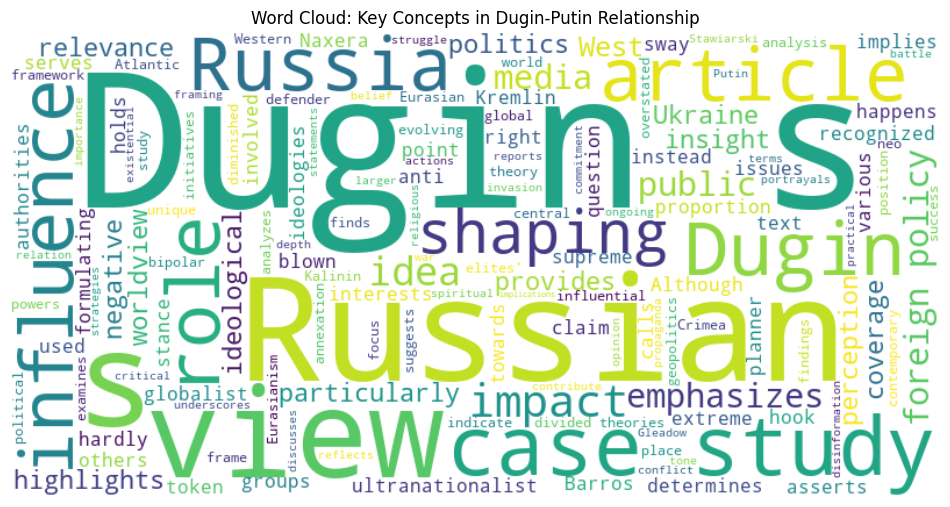

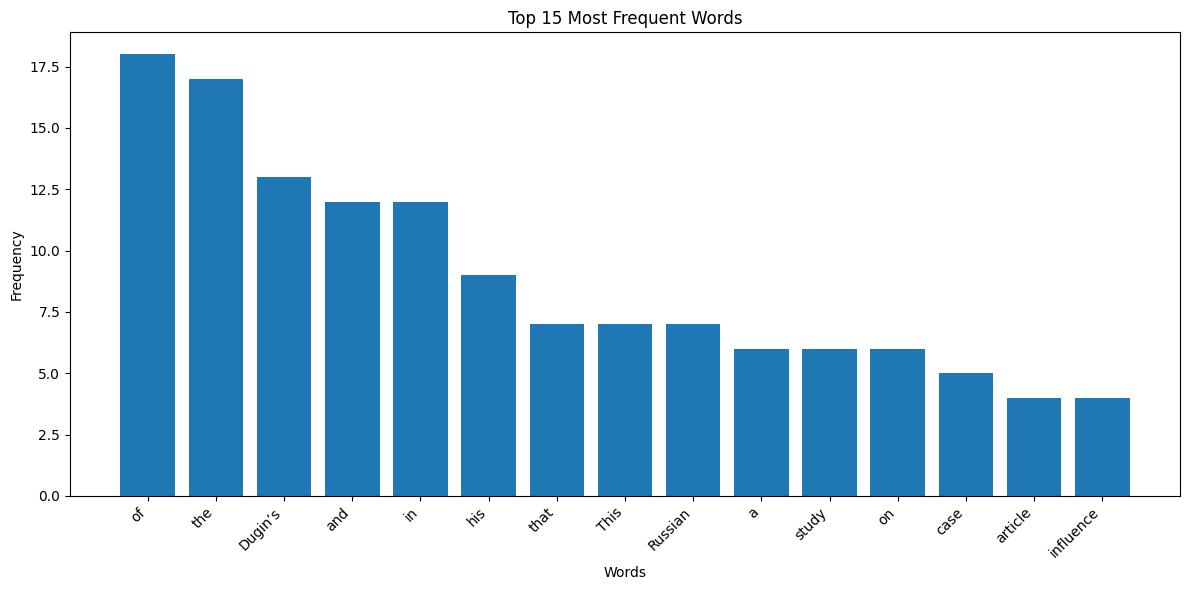

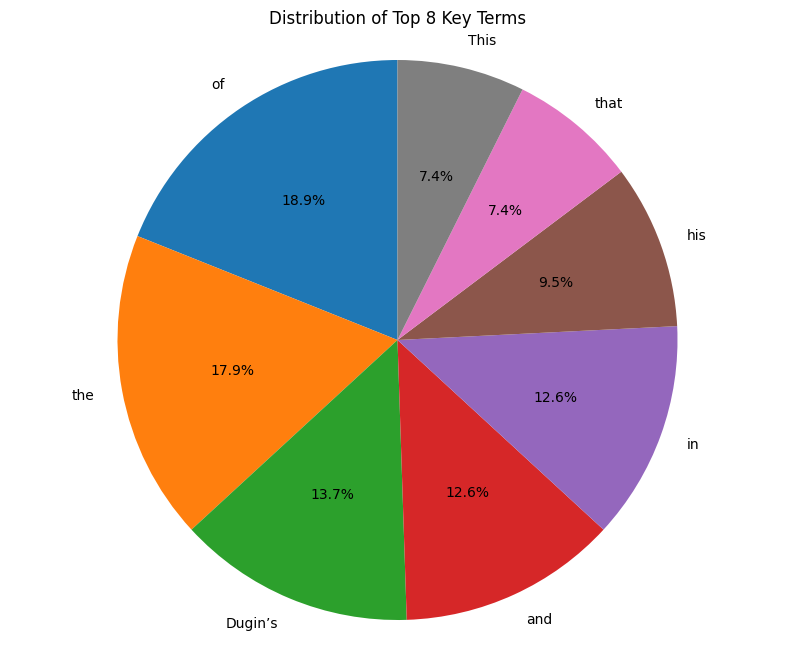

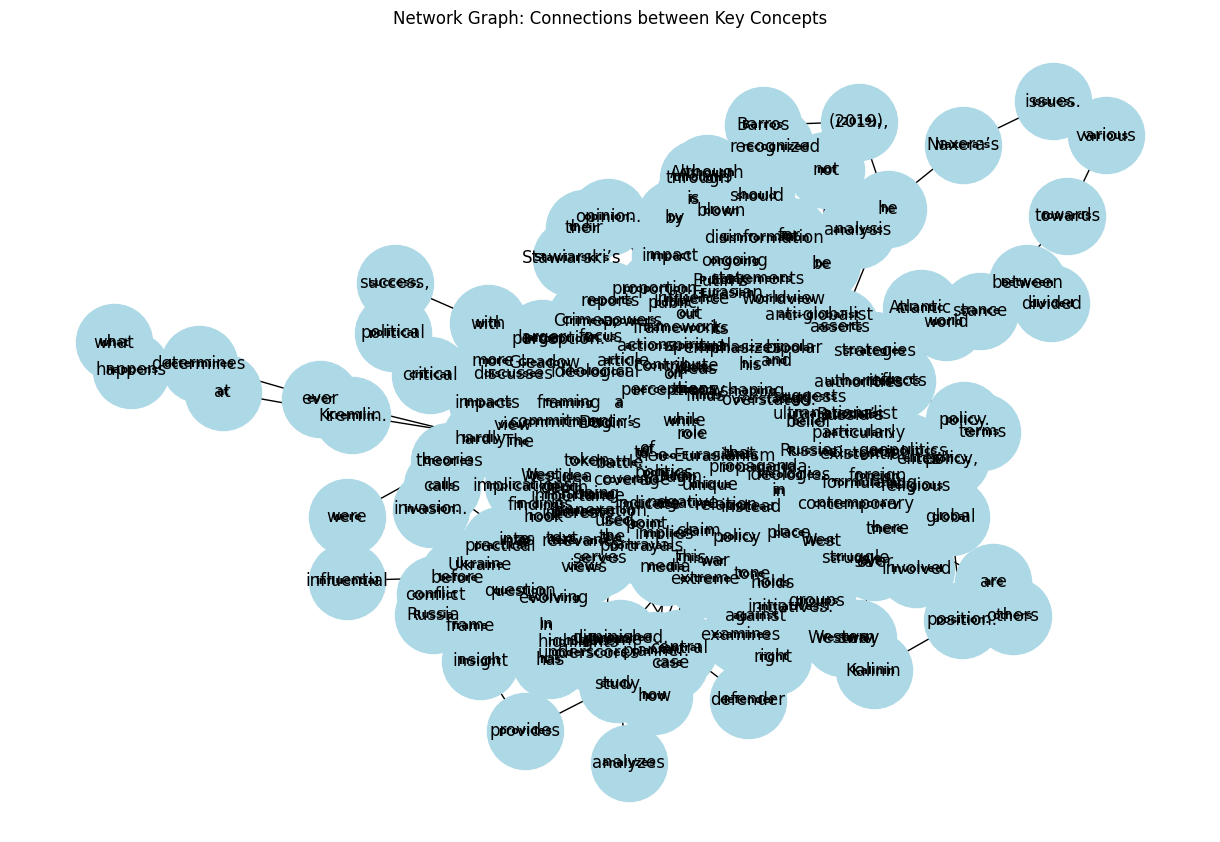

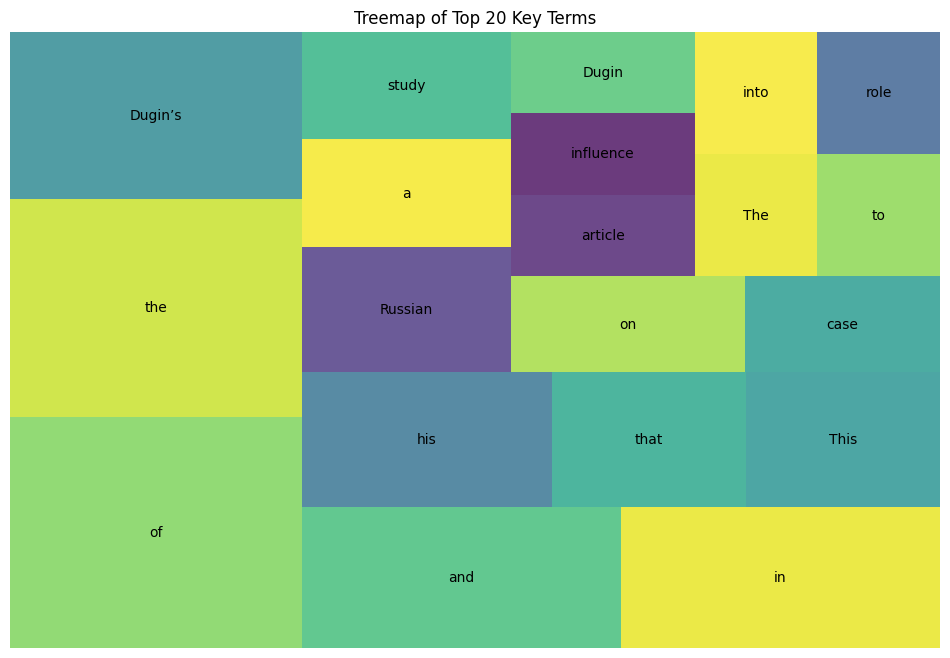

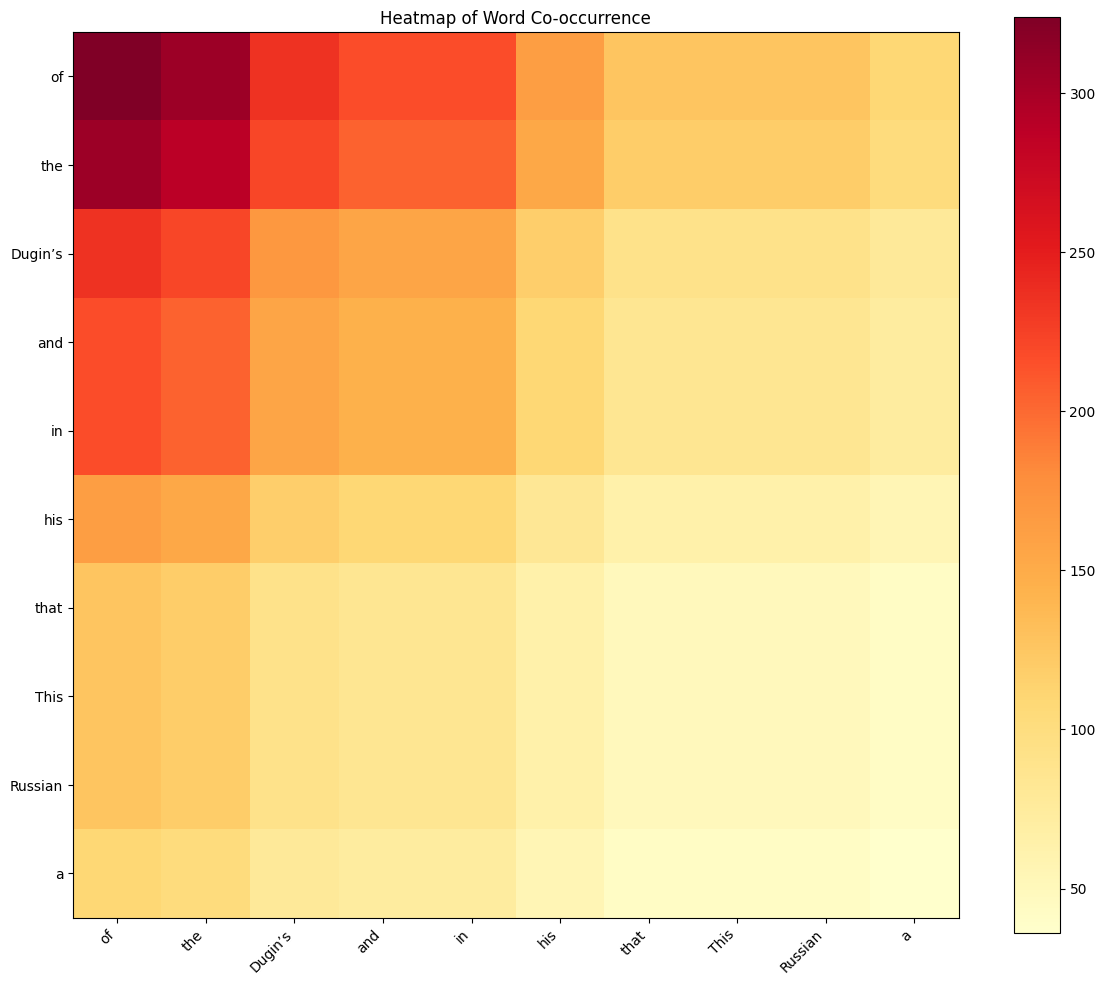

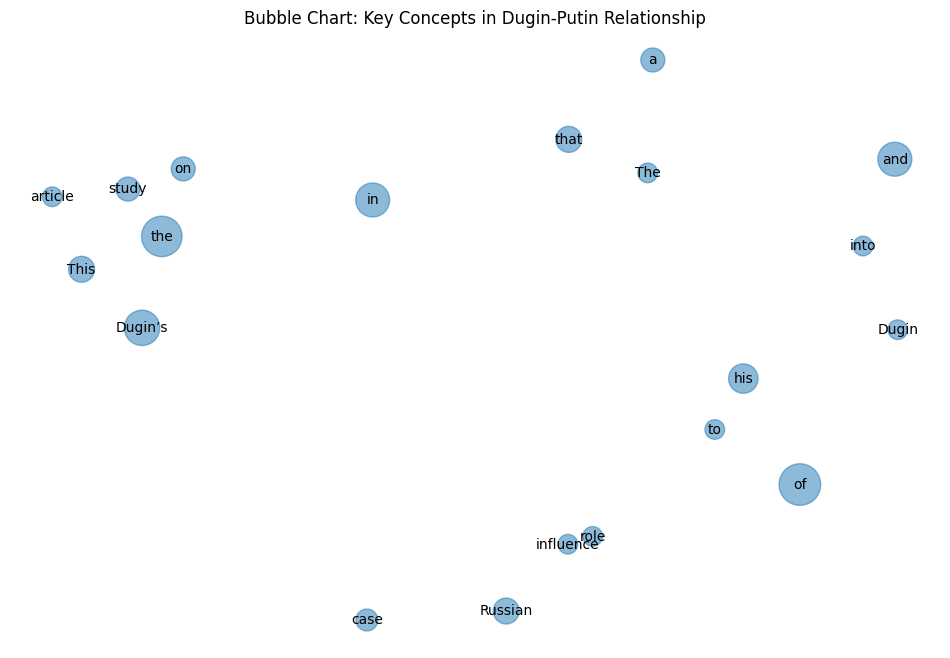

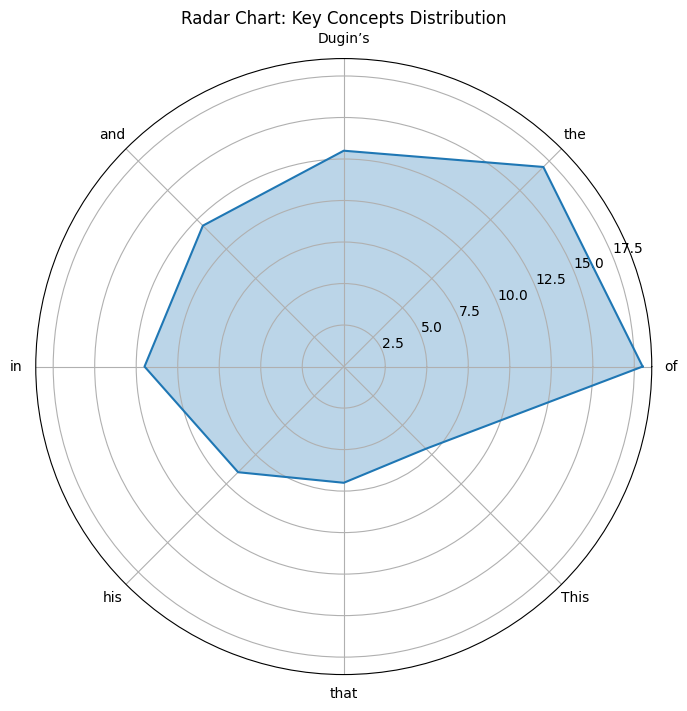

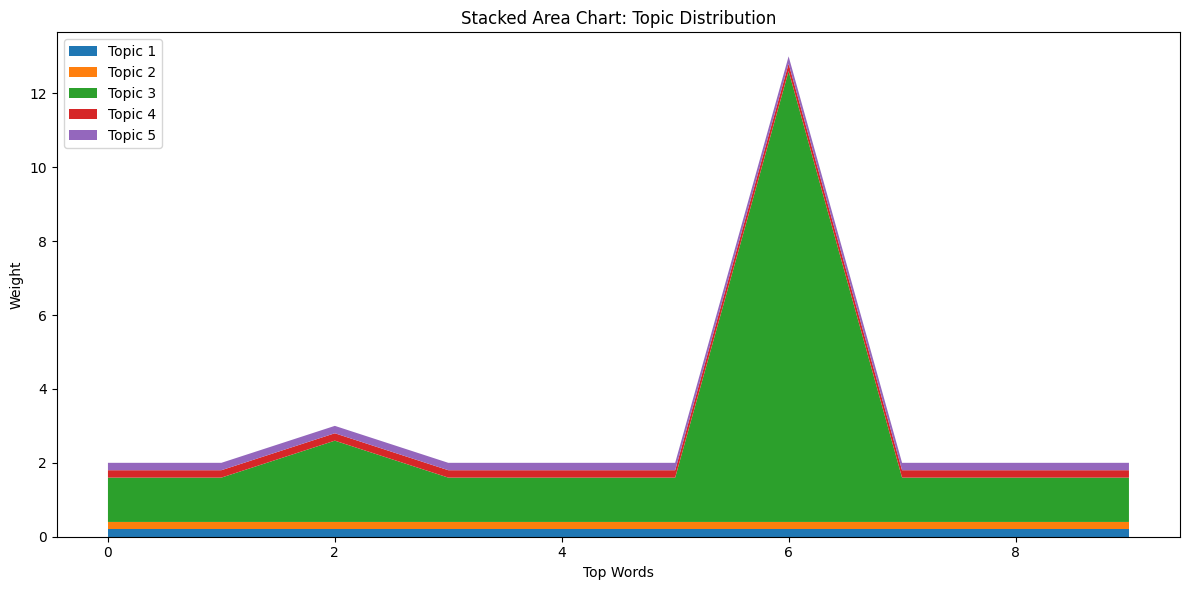

In [18]:
# Call the functions to generate the visualizations
create_word_cloud(text)
create_bar_chart(text)
create_pie_chart(text)
create_network_graph(text)
create_treemap(text)
create_heatmap(text)
create_bubble_chart(text)
create_radar_chart(text)
create_stacked_area_chart(text)
create_sunburst_chart(text)